## CS610 - April Term - Group 1 Project Code

#### Predicting Tech Salaries in Singapore - 2023

## 📑 Importing Libraries

In [5]:
import warnings
warnings.filterwarnings("ignore")
import string, re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from pprint import pprint
from time import time
import logging
import time
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

## 🗂️ The Data Set Details

In [6]:
df = pd.read_csv("glass_door_salaries_sg.csv")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5983 entries, 0 to 5982
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           5983 non-null   object 
 1   company_rating    5983 non-null   float64
 2   location          5983 non-null   object 
 3   job_title         5983 non-null   object 
 4   job_description   5983 non-null   object 
 5   company_size      5983 non-null   object 
 6   company_type      5983 non-null   object 
 7   company_sector    5983 non-null   object 
 8   company_industry  5983 non-null   object 
 9   company_founded   5983 non-null   int64  
 10  company_revenue   5983 non-null   object 
 11  salary_estimate   5934 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 561.0+ KB


In [8]:
df.shape

(5983, 12)

In [9]:
df.head()

,company,company_rating,location,job_title,job_description,company_size,company_type,company_sector,company_industry,company_founded,company_revenue,salary_estimate
0,Grit Search\n5.0,5.0,Singapore,"Senior Analyst, Information Technology (Platform)",Location\nSingapore\nDate\n21 Sep\nIndustry\nT...,1 to 50 Employees,Company - Private,Human Resources & Staffing,HR Consulting,2020,Unknown / Non-Applicable,16200.0
1,Kabam Robotics\n4.0,4.0,Serangoon,Software Engineering Intern,Be a part of the robotics revolution!\nWe are ...,501 to 1000 Employees,Company - Private,Media & Communication,Video Game Publishing,2006,Unknown / Non-Applicable,6100.0
2,Hiverlab\n4.5,4.5,Singapore,Backend Engineer,Company\nHiverlab\nhiverlab.com\nDesignation\n...,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,2014,Less than $1 million (USD),11400.0
3,YOLO TECHNOLOGY PTE. LTD.\n4.1,4.1,Singapore,Data Science Intern,Key Responsibilities:\nData Crunching and data...,1 to 50 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,2016,Unknown / Non-Applicable,16800.0
4,NetVirta\n4.8,4.8,Singapore,Researcher Intern,Company\nNetVirta\nnetvirta.com\nDesignation\n...,51 to 200 Employees,Company - Private,Information Technology,Computer Hardware Development,2013,Unknown / Non-Applicable,30900.0


In [10]:
df['salary_estimate'].head()

0    16200.0
1     6100.0
2    11400.0
3    16800.0
4    30900.0
Name: salary_estimate, dtype: float64

## 🧹 Data Cleaning

#### Removing the rating infromation in the company column

In [11]:
df['company'] = df['company'].apply(lambda x: x.split('\n')[0].strip())

In [12]:
df['company'].nunique()

1835

#### checking for null values

In [13]:
df = df.dropna(subset=['salary_estimate'])

In [14]:
df.shape

(5934, 12)

In [15]:
df['link'] = pd.concat([df['job_title'], df['job_description'],df['company'],df['company_industry']], axis=1).apply(lambda x: ''.join(x), axis=1)

In [16]:
df = df.drop_duplicates(subset="link", keep='first')

In [17]:
df.shape

(5743, 13)

## ⚙️ Adding New Features

##### Let's extract the qualifications needed to apply for the job

In [18]:
def edu(job_simp):
    if 'sr' in job_simp.lower() or 'associate' in job_simp.lower() or 'bachelor' in job_simp.lower() or 'undergraduate' in job_simp.lower() or 'bachelors' in job_simp.lower() or 'undergrad' in job_simp.lower():
            return 'Bachelors'
    elif 'masters' in job_simp.lower() or 'master' in job_simp.lower() or 'postgraduate' in job_simp.lower() or 'postgrad' in job_simp.lower():
        return 'Masters'
    elif 'phd' in job_simp.lower() or 'doctorate' in job_simp.lower():
        return 'Doctorate'
    elif 'mba' in job_simp.lower():
        return 'MBA'
    else:
        return 'na'

In [19]:
df['job_education'] = df['job_description'].apply(edu)

df['job_education'].value_counts()

na           2970
Bachelors    2365
Masters       280
Doctorate      71
MBA            57
Name: job_education, dtype: int64

In [20]:
df.isnull().sum()

company             0
company_rating      0
location            0
job_title           0
job_description     0
company_size        0
company_type        0
company_sector      0
company_industry    0
company_founded     0
company_revenue     0
salary_estimate     0
link                0
job_education       0
dtype: int64

##### Let's extract the experience needed to apply for the job

In [21]:
def extract_experience(description):
    pattern = r'(?:Experience level|experience|\+).*(?:\n.*)*(\d+|\+)\s*(?:year|years|\+ years|\+ years of experience)'
    matches = re.findall(pattern, description, flags=re.IGNORECASE)
    
    if matches:
        experience = matches[0]
        if experience == '+':
            return "+10 years"
        elif int(experience) < 2:
            return "0-2 years"
        elif int(experience) < 5:
            return "2-5 years"
        elif int(experience) < 10:
            return "5-10 years"
        else:
            return "+10 years"
    else:
        return None

In [22]:
df['job_experience'] = df['job_description'].apply(lambda x: extract_experience(x))

df['job_experience'].value_counts()

2-5 years     823
5-10 years    741
+10 years     444
0-2 years     260
Name: job_experience, dtype: int64

##### Lets try to simlify the job titles

In [23]:
def title_simplifier(title):
    if 'data scientist' in title.lower() or 'data science analyst' in title.lower() or 'scientist' in title.lower() or 'data science' in title.lower():
        return 'Data Scientist'
    elif 'data analyst' in title.lower() or 'data analytics' in title.lower() or 'product analyst' in title.lower() or 'supplychain' in title.lower() or 'pricing' in title.lower() or 'data entry analysis' in title.lower() or 'system analyst' in title.lower() or 'business analysis' in title.lower() or 'data developer' in title.lower():
        return 'Data Analyst'
    elif 'analyst' in title.lower() or 'associate' in title.lower():
        return 'Analyst/Associate'
    elif 'research' in title.lower() or 'research fellows' in title.lower():
        return 'Research Analyst/Research Associate'
    elif 'machine learning' in title.lower() or 'ai' in title.lower():
        return 'Machine Learning Engineer'
    elif 'consultant' in title.lower()or 'principal' in title.lower():
        return 'Technology/Analytics Consultant'
    elif 'business intelligence' in title.lower() or 'bie' in title.lower() or 'insights' in title.lower() or 'visualization' in title.lower():
        return 'Business Intelligence Analyst'
    elif 'business analyst' in title.lower() or 'owner' in title.lower() or 'product' in title.lower() or 'digital' in title.lower():
        return 'Business Analyst'
    elif 'data engineer' in title.lower() or 'data engineering' in title.lower() or 'support engineer' in title.lower() or 'data architect' in title.lower():
        return 'Data Engineer'
    elif 'data management' in title.lower() or 'governance' in title.lower() or 'data administrator' in title.lower():
        return 'Data Management'
    elif 'statistician' in title.lower():
        return 'Statistician'
    elif 'quantitative' in title.lower() or 'quant' in title.lower():
        return 'Quantitative Analyst'
    elif 'analytics manager' in title.lower() or 'senior manager' in title.lower() or 'director' in title.lower() or 'vp' in title.lower() or 'avp' in title.lower():
        return 'Analytics Manager/Senior Manager/Director/VP/AVP'
    elif 'computer vision' in title.lower() or 'cv' in title.lower() or 'natural language processing' in title.lower() or 'nlp' in title.lower() or 'text analytics' in title.lower() or 'artificial intelligence' in title.lower() or 'ai' in title.lower() or 'rpa' in title.lower():
        return 'AI Developer/Engineer'
    elif 'software engineer' in title.lower() or 'software developer' in title.lower() or 'software' in title.lower() or 'application developer' in title.lower() or 'applications developer' in title.lower() or 'app' in title.lower() or 'applications' in title.lower() or 'developer support' in title.lower() or 'game' in title.lower() or 'software' in title.lower() or 'android' in title.lower() or 'mobile' in title.lower():
        return 'Software Developer/Engineer'
    elif 'full-stack' in title.lower() or 'fullstack' in title.lower() or 'full stack' in title.lower() or 'platform developer' in title.lower() or 'web application' in title.lower() or 'datacap' in title.lower() or 'java developer' in title.lower() or 'summit' in title.lower() or 'web api' in title.lower() or 'net' in title.lower() or 'summit' in title.lower() or 'javascript' in title.lower() or 'c++' in title.lower() or 'c/c++' in title.lower():
        return 'Full-stack Developer'
    elif 'front-end' in title.lower() or 'frontend' in title.lower() or 'front end' in title.lower() or 'web developer' in title.lower():
        return 'Front-end Developer'
    elif 'back-end' in title.lower() or 'backend' in title.lower() or 'back end' in title.lower():
        return 'Back-end Developer'
    elif 'devops' in title.lower() or 'dev ops' in title.lower() or 'devopssecops' in title.lower() or 'devops/secops' in title.lower() or 'devsecops' in title.lower() or 'ops' in title.lower():
        return 'DevOps Engineer'
    elif 'cloud developer' in title.lower() or 'cloud' in title.lower() or 'aqua' in title.lower() or 'big data' in title.lower():
        return 'Cloud Developer/Engineer'
    elif 'quality assurance engineer' in title.lower() or 'quality' in title.lower():
        return 'Quality Assurance Engineer'
    elif 'technical lead' in title.lower() or 'lead' in title.lower():
        return 'Technical/Analytics Lead'
    elif 'scrum master' in title.lower() or 'scrum' in title.lower() or 'agility' in title.lower():
        return 'Agility/Scrum Master'
    elif 'cyber' in title.lower() or 'cyber security' in title.lower() or 'cybersecurity' in title.lower() or 'infosecurity' in title.lower() or 'threat' in title.lower() or 'security' in title.lower():
        return 'Cyber Security Engineer'
    elif 'systems engineer' in title.lower() or 'system engineer' in title.lower() or 'pega' in title.lower() or 'system administrator' in title.lower() or 'system' in title.lower() or 'systems' in title.lower() or 'automation' in title.lower() or 'it engineer' in title.lower():
        return 'Systems Engineer'
    elif 'technical support' in title.lower() or 'it support' in title.lower():
        return 'Technical Support Engineer'
    elif 'network engineer' in title.lower() or 'network' in title.lower() or 'noc' in title.lower():
        return 'Network Engineer'
    elif 'test automation engineer' in title.lower() or 'testing' in title.lower():
        return 'Test Automation Engineer'
    elif 'performance engineer' in title.lower():
        return 'Performance Engineer'
    elif 'infrastructure' in title.lower() or 'site reliability' in title.lower() or 'operations engineer' in title.lower():
        return 'Infrastructure Engineer'
    elif 'database' in title.lower() or 'SQL developer' in title.lower() or 'data centre' in title.lower() or 'data platform' in title.lower():
        return 'Database Developer/Engineer'
    elif 'ui' in title.lower() or 'ux' in title.lower():
        return 'UI/UX Developer'
    elif 'it manager' in title.lower() or 'engineering manager' in title.lower() or 'technology manager' in title.lower() or 'manager' in title.lower():
        return 'IT/Engineering Manager'
    elif 'solution architect' in title.lower() or 'solutions architect' in title.lower():
        return 'Solution Architect'
    elif 'intern' in title.lower() or 'internship' in title.lower():
        return 'Tech Intern'
    elif 'finance' in title.lower() or 'fintech' in title.lower() or 'blockchain' in title.lower() or 'financial' in title.lower():
        return 'Financial Analyst'
    elif 'quality' in title.lower() or 'qa' in title.lower() or 'qc' in title.lower() or 'qaqc' in title.lower():
        return 'Quality Analyst/Engineer'
    else:
        return 'NA'

In [24]:
df['job_simp'] = df['job_title'].apply(title_simplifier)
job_counts = df['job_simp'].value_counts()
print(job_counts)

Analyst/Associate                                   896
Software Developer/Engineer                         676
NA                                                  572
Full-stack Developer                                423
Systems Engineer                                    315
Data Engineer                                       234
Data Scientist                                      233
IT/Engineering Manager                              223
Data Analyst                                        211
DevOps Engineer                                     188
Machine Learning Engineer                           183
Cyber Security Engineer                             171
Business Analyst                                    168
Analytics Manager/Senior Manager/Director/VP/AVP    167
Technology/Analytics Consultant                     163
Technical/Analytics Lead                            127
Cloud Developer/Engineer                            104
Infrastructure Engineer                         

##### Adding the seniority titles

In [25]:
def seniority_title(job_simp):
    if 'sr' in job_simp.lower() or 'senior' in job_simp.lower() or 'sr.' in job_simp.lower() or 'lead' in job_simp.lower() or 'principal' in job_simp.lower():
        return 'senior'
    elif 'manager' in job_simp.lower() or 'sr.manager' in job_simp.lower()or 'director' in job_simp.lower() or 'AVP' in job_simp.lower() or 'VP' in job_simp.lower() or 'head' in job_simp.lower()or 'president' in job_simp.lower():
        return 'leadership'
    elif 'jr' in job_simp.lower() or 'jr.' in job_simp.lower()or 'junior' in job_simp.lower() or 'I' in job_simp.lower() or 'associate' in job_simp.lower()or 'assistant' in job_simp.lower():
        return 'entry level'
    elif 'intern' in job_simp.lower() or 'internship' in job_simp.lower()or 'trainee' in job_simp.lower():
        return 'internship'
    else:
        return 'na'

In [26]:
df['seniority_title'] = df['job_title'].apply(seniority_title)
seniority = df['seniority_title'].value_counts()
print(seniority)

na             3469
senior         1435
leadership      541
entry level     256
internship       42
Name: seniority_title, dtype: int64


##### Lets try to grab skillsets

In [27]:
#parsing of job description (python, etc.)
tools = ['tableau', 'powerbi' 'power bi', 'qilk', 'qlikview', 'sas', 'spss', 'alteryx', 'knime', 'rapidminer', 'excel','google sheets', 'stata', 'jupyter notebook', 'zeppelin notebook', 'microstrategy', 'looker', 'sap businessobjects', 'talend', 'informatica powercenter',  'd3\.js', 'bokeh', 'ggplot']
cloud_skills = ['cloud service', 'virtualization', 'cybersecurity', 'cloud storage', 'multicloud', 'linux', 'automation', 'orchestration', 'containerization', 'devops', 'infrastructure as a service', 'platform as a service', 'software as a service', 'database as a service', 'serverless', 'microservices', 'data migration', 'system migration', 'cloud migration',  'hybrid cloud', 'public cloud', 'private cloud', 'cloud networking', 'cloud security', 'cloud applications', 'cloud architecture', 'cloud performance', 'cloud scalability','cloud reliability', 'cloud monitoring', 'cloud analytics', 'cloud strategy', 'cloud governance','cloud computing' ]
programming_languages = ['python','java', 'scala', 'julia', 'sas', 'matlab', 'vba', 'c\+\+', 'c#', 'ruby', 'perl', 'php', 'sql', 'javascript', 'typescript', 'swift',  'kotlin', 'shell', 'bash', 'powershell', 'groovy', 'golang', 'rust']
cloud_technologies = ['amazon web services','aws', 'google cloud', 'microsoft azure', 'ibm cloud', 'docker', 'kubernetes', 'openshift','terraform', 'cloudformation', 'azure resource manager', 'ansible', 'chef', 'puppet','jenkins', 'gitlab', 'python', 'java', 'node.js', 'ruby', 'perl', 'php', 'sql', 'nosql', 'cassandra', 'mongodb', 'hadoop', 'spark', 'elasticsearch', 'kibana', 'logstash', 'prometheus', 'grafana', 'jaeger', 'istio', 'nginx', 'apache', 'haproxy', 'vpc', 'vpn', 'lambda', 'ec2', 's3', 'rds', 'dynamodb', 'redshift', 'kinesis', 'cloudwatch', 'cloudtrail', 'athena', 'glue','snowflake', 'firebase', 'gcp dataflow', 'gcp pub/sub', 'bigquery', 'gcp cloud storage','gcp app engine', 'gcp kubernetes engine', 'gcp cloud functions',  'azure devops', 'azure functions', 'azure logic apps', 'azure kubernetes service', 'azure cosmos db', 'azure sql database', 'azure storage', 'azure virtual network', 'azure virtual machines','kafka', 'pig', 'hive','spark', 'tez', 'giraph', 'mapreduce', 'yarn', 'hdfs', 'hbase', 'hcatalog', 'sqoop', 'flume','drill', 'impala', 'sparkstreaming', 'solr', 'zookeeper', 'ambari', 'oozie','flink', 'beam', 'airflow', 'nifi']
certifications = ['aws certified solutions architect', 'google professional cloud architect','microsoft certified: azure solutions architect expert', 'aws certified developer','google professional data engineer', 'azure developer associate','certified information security manager', 'certified information systems security professional','certified kubernetes administrator', 'certified kubernetes application developer','aws certified sysops administrator', 'aws certified devops engineer', 'aws certified security - specialty', 'google associate cloud engineer', 'google professional devops engineer', 'google professional security engineer', 'azure fundamentals', 'azure administrator associate','azure security engineer associate', 'azure ai']

In [28]:
def extract_skills_columns(df, tools, cloud_skills,programming_languages,cloud_technologies,certifications):
    for tool in tools:
        df[tool + '_yn'] = df['job_description'].apply(lambda x: 1 if isinstance(x, str) and tool in x.lower() else 0)
    for cloud_skill in cloud_skills:
        df[cloud_skill + '_yn'] = df['job_description'].apply(lambda x: 1 if isinstance(x, str) and cloud_skill in x.lower() else 0)
    for programming_languages in programming_languages:
        df[programming_languages + '_yn'] = df['job_description'].apply(lambda x: 1 if isinstance(x, str) and programming_languages in x.lower() else 0) 
    for cloud_technologies in cloud_technologies:
        df[cloud_technologies + '_yn'] = df['job_description'].apply(lambda x: 1 if isinstance(x, str) and cloud_technologies in x.lower() else 0)
    for certifications in certifications:
        df[certifications + '_yn'] = df['job_description'].apply(lambda x: 1 if isinstance(x, str) and certifications in x.lower() else 0)        
    return df

In [29]:
df = extract_skills_columns(df, tools, cloud_skills,programming_languages,cloud_technologies,certifications)

## Final Data After Cleaning 🤹

df

In [30]:
columns= df.columns
# Print the column names
for column in columns:
    print(column)

company
company_rating
location
job_title
job_description
company_size
company_type
company_sector
company_industry
company_founded
company_revenue
salary_estimate
link
job_education
job_experience
job_simp
seniority_title
tableau_yn
powerbipower bi_yn
qilk_yn
qlikview_yn
sas_yn
spss_yn
alteryx_yn
knime_yn
rapidminer_yn
excel_yn
google sheets_yn
stata_yn
jupyter notebook_yn
zeppelin notebook_yn
microstrategy_yn
looker_yn
sap businessobjects_yn
talend_yn
informatica powercenter_yn
d3\.js_yn
bokeh_yn
ggplot_yn
cloud service_yn
virtualization_yn
cybersecurity_yn
cloud storage_yn
multicloud_yn
linux_yn
automation_yn
orchestration_yn
containerization_yn
devops_yn
infrastructure as a service_yn
platform as a service_yn
software as a service_yn
database as a service_yn
serverless_yn
microservices_yn
data migration_yn
system migration_yn
cloud migration_yn
hybrid cloud_yn
public cloud_yn
private cloud_yn
cloud networking_yn
cloud security_yn
cloud applications_yn
cloud architecture_yn
cloud pe

## Exploratory Data Analysis  📊

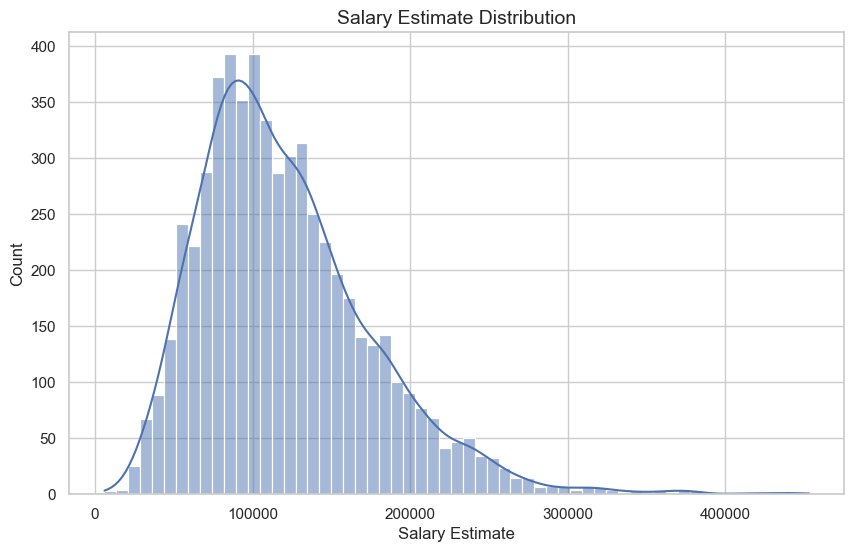

In [31]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='salary_estimate', kde=True)
plt.title("Salary Estimate Distribution", fontsize=14)
plt.xlabel("Salary Estimate", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

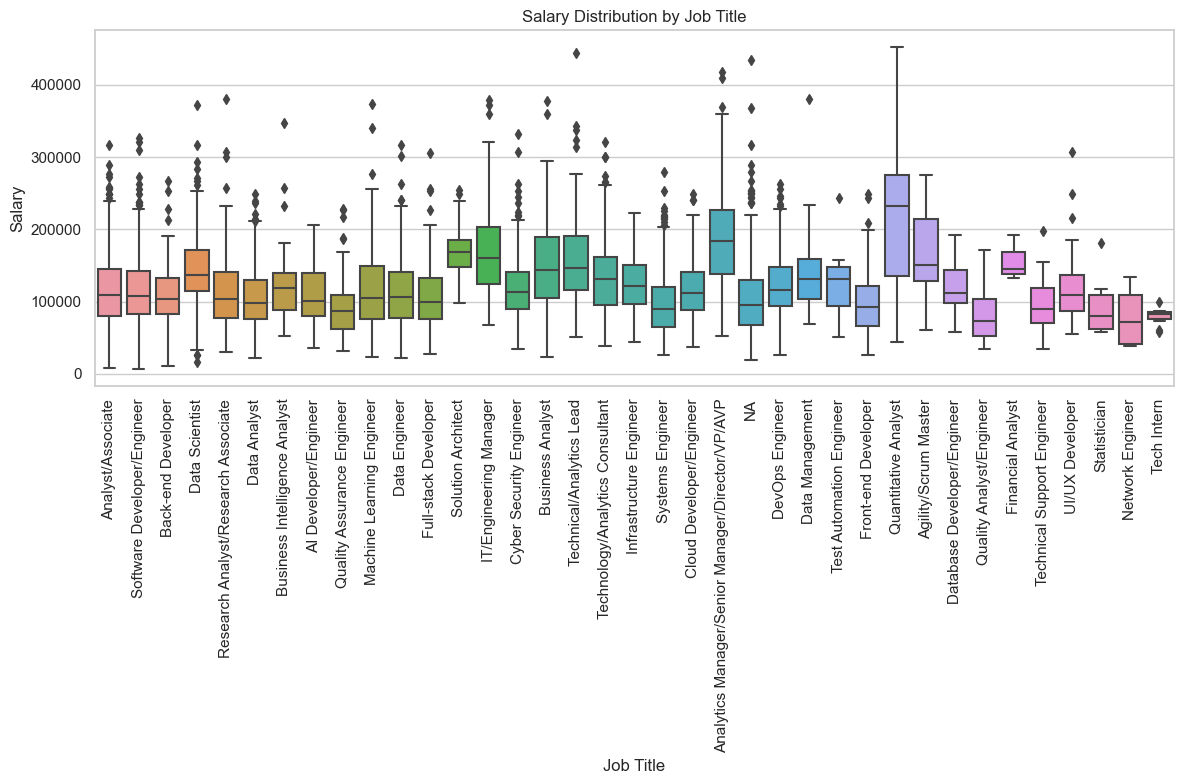

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_simp', y='salary_estimate', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Salary')
plt.tight_layout()
plt.show()

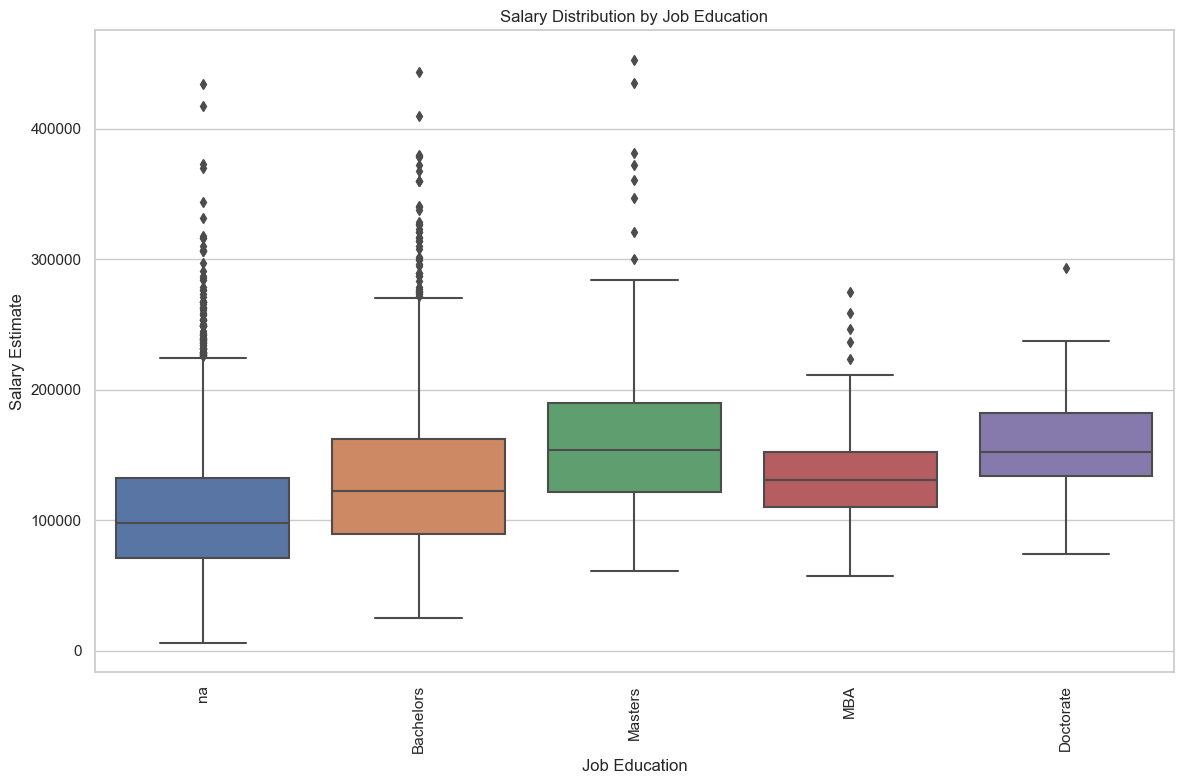

In [33]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_education', y='salary_estimate', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Job Education')
plt.xlabel('Job Education')
plt.ylabel('Salary Estimate')
plt.tight_layout()
plt.show()

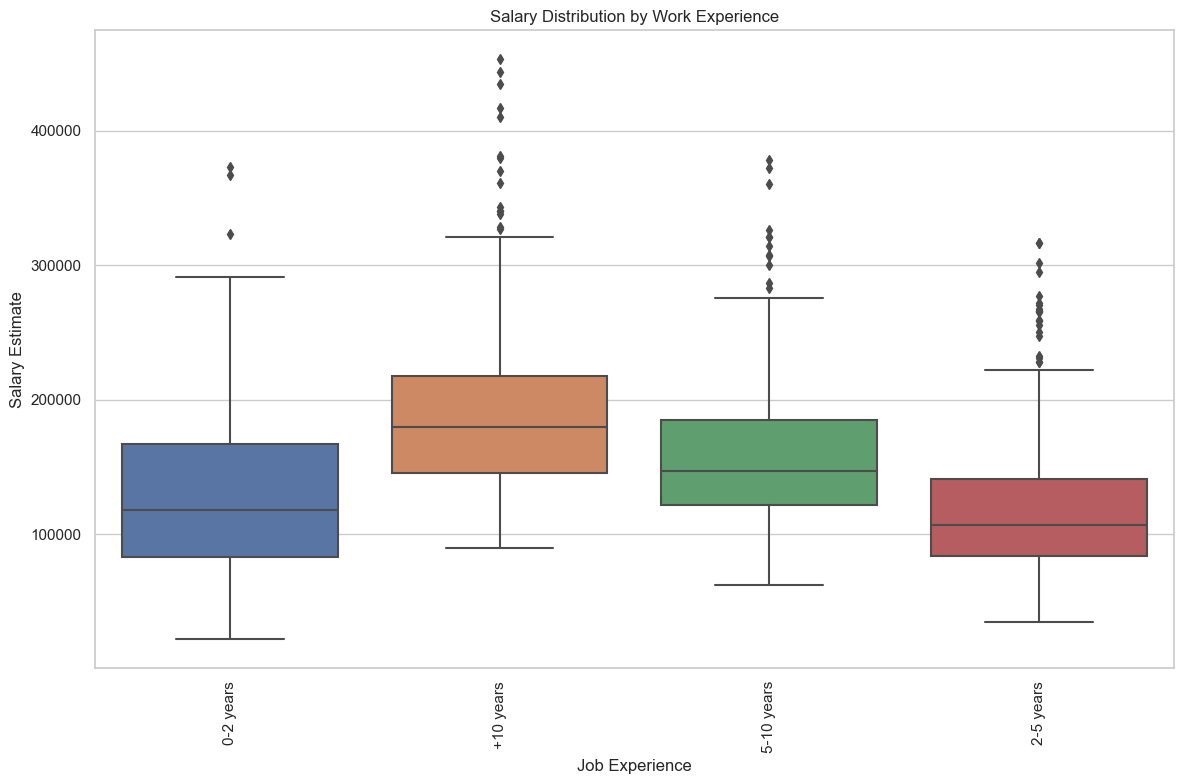

In [34]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='job_experience', y='salary_estimate', data=df)
plt.xticks(rotation=90)
plt.title('Salary Distribution by Work Experience')
plt.xlabel('Job Experience')
plt.ylabel('Salary Estimate')
plt.tight_layout()
plt.show()

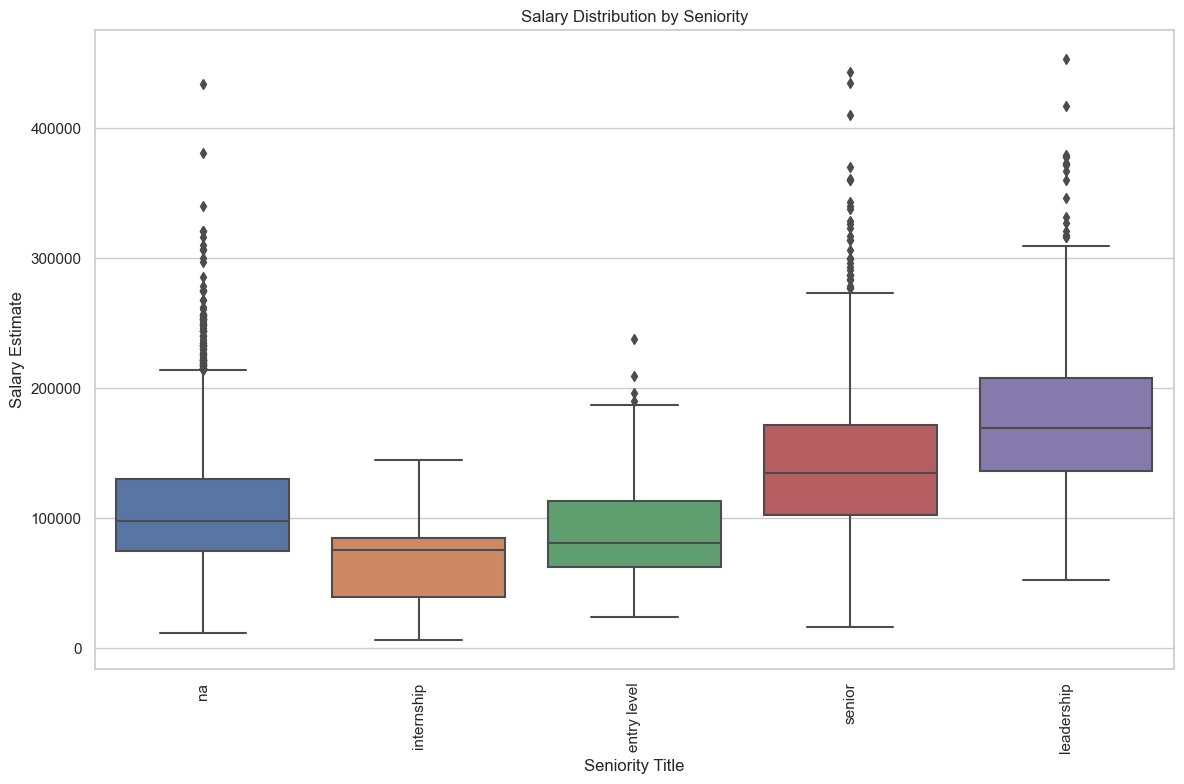

In [35]:
plt.figure(figsize=(12, 8))

# Define the desired order of classes
class_order = ['na', 'internship', 'entry level', 'senior', 'leadership']

# Use the 'order' parameter to arrange the boxplot based on the class_order
sns.boxplot(x='seniority_title', y='salary_estimate', data=df, order=class_order)

plt.xticks(rotation=90)
plt.title('Salary Distribution by Seniority')
plt.xlabel('Seniority Title')
plt.ylabel('Salary Estimate')
plt.tight_layout()
plt.show()

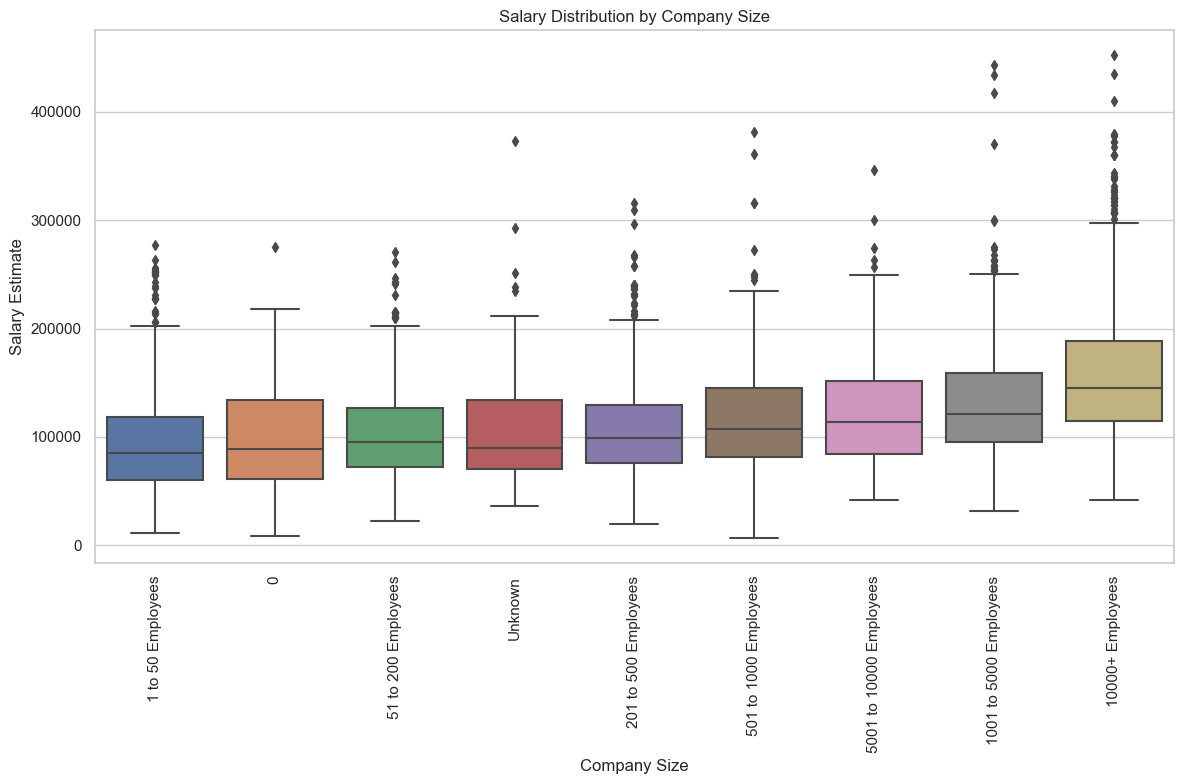

In [70]:
plt.figure(figsize=(12, 8))

# Calculate the average salary estimate for each company sector
average_salary_by_sector = df.groupby('company_size')['salary_estimate'].mean().sort_values()

# Create a list of sectors sorted by average salary
size_order = average_salary_by_sector.index.tolist()

# Define the desired order of classes
#class_order = ['na', 'internship', 'entry level', 'senior', 'leadership']

# Use the 'order' parameter to arrange the boxplot based on the class_order
sns.boxplot(x='company_size', y='salary_estimate', data=df, order=size_order)

plt.xticks(rotation=90)
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary Estimate')
plt.tight_layout()
plt.show()

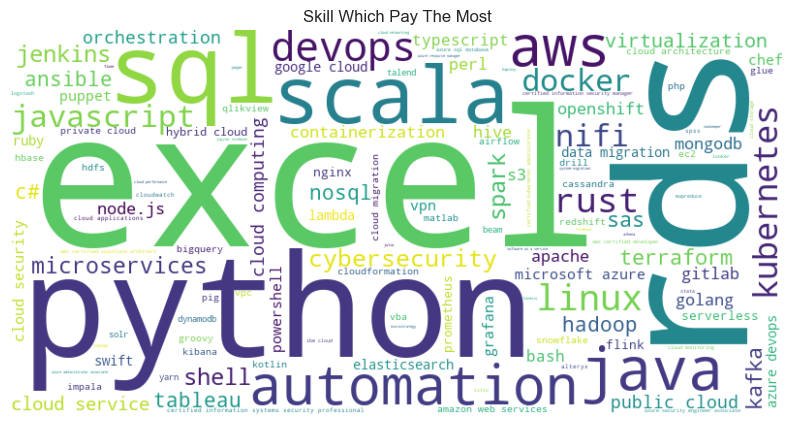

In [60]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

average_salary = df['salary_estimate'].mean()

word_frequencies = {}

for index, row in df.iterrows():
    for column in df.columns:
        if column.endswith('_yn') and row[column] == 1:
            skill = column[:-3]
            if skill not in word_frequencies or row['salary_estimate'] > average_salary:
                word_frequencies[skill] = word_frequencies.get(skill, 0) + 1
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=exclude_words).generate_from_frequencies(word_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Skill Which Pay The Most')
plt.axis('off')
plt.show()


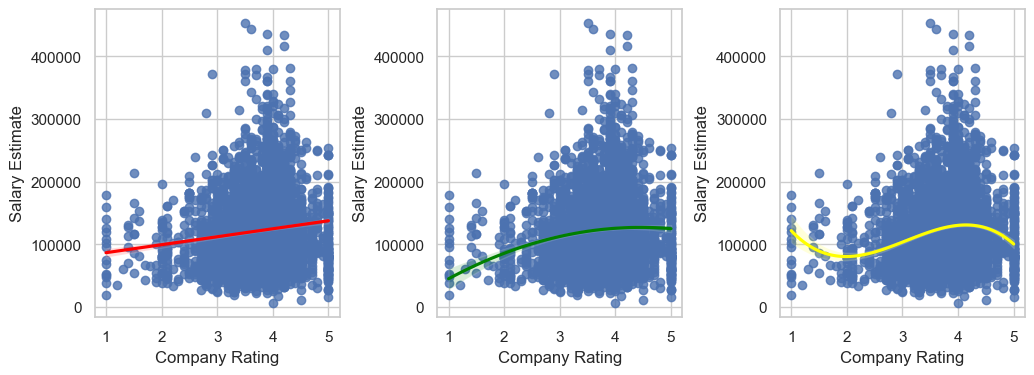

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the data in a pandas DataFrame called 'filtered_df'
# with columns 'company_rating' and 'salary_estimate'

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Create scatter plot of 'company_rating' vs 'salary_estimate' with polynomial regression line
sns.regplot(x='company_rating', y='salary_estimate', data=filtered_df, ax=axes[0], order=1, line_kws={'color':'red'})
sns.regplot(x='company_rating', y='salary_estimate', data=filtered_df, ax=axes[1], order=2, line_kws={'color':'green'})
sns.regplot(x='company_rating', y='salary_estimate', data=filtered_df, ax=axes[2], order=3, line_kws={'color':'yellow'})
axes[0].set_xlabel('Company Rating')
axes[0].set_ylabel('Salary Estimate')

axes[1].set_xlabel('Company Rating')
axes[1].set_ylabel('Salary Estimate')

axes[2].set_xlabel('Company Rating')
axes[2].set_ylabel('Salary Estimate')

# Adjust the spacing between subplots to prevent overlapping y-axis labels
plt.subplots_adjust(wspace=0.4)

# Display the plots
plt.show()


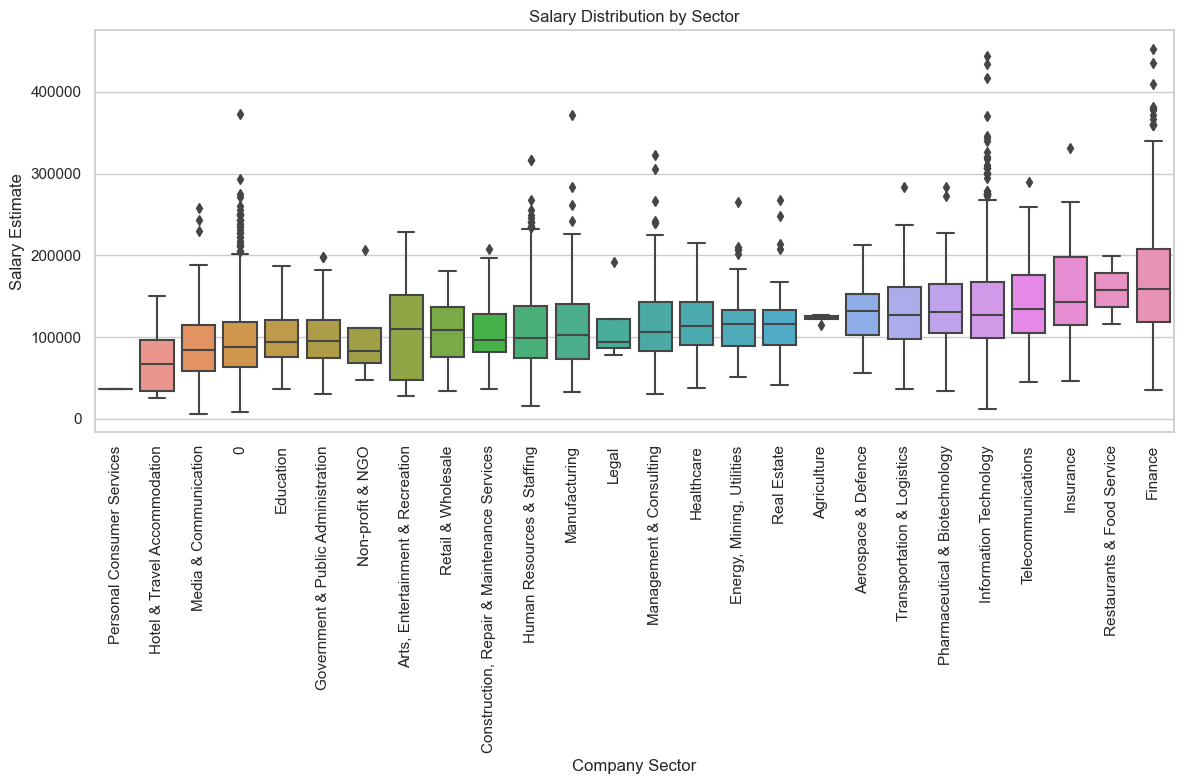

In [64]:
# Calculate the average salary estimate for each company sector
average_salary_by_sector = df.groupby('company_sector')['salary_estimate'].mean().sort_values()

# Create a list of sectors sorted by average salary
sector_order = average_salary_by_sector.index.tolist()

# Create a figure
plt.figure(figsize=(12, 8))

# Use the 'order' parameter to arrange the boxplot based on the sector_order
sns.boxplot(x='company_sector', y='salary_estimate', data=df, order=sector_order)

plt.xticks(rotation=90)
plt.title('Salary Distribution by Sector')
plt.xlabel('Company Sector')
plt.ylabel('Salary Estimate')
plt.tight_layout()
plt.show()

## Encode the Categorical Data  💪

In [40]:
# Specify the columns for which you want to create dummy variables
columns_to_encode = ['company_industry', 'seniority_title', 'company_size', 'company_revenue',
                     'job_education', 'company_type', 'job_experience', 'job_simp', 'company_sector']

# Create dummy variables
df = pd.get_dummies(df, columns=columns_to_encode)

# Print the encoded dataframe
df.head()

,company,company_rating,location,job_title,job_description,company_founded,salary_estimate,link,tableau_yn,powerbipower bi_yn,...,company_sector_Manufacturing,company_sector_Media & Communication,company_sector_Non-profit & NGO,company_sector_Personal Consumer Services,company_sector_Pharmaceutical & Biotechnology,company_sector_Real Estate,company_sector_Restaurants & Food Service,company_sector_Retail & Wholesale,company_sector_Telecommunications,company_sector_Transportation & Logistics
0,Grit Search,5.0,Singapore,"Senior Analyst, Information Technology (Platform)",Location\nSingapore\nDate\n21 Sep\nIndustry\nT...,2020,16200.0,"Senior Analyst, Information Technology (Platfo...",0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kabam Robotics,4.0,Serangoon,Software Engineering Intern,Be a part of the robotics revolution!\nWe are ...,2006,6100.0,Software Engineering InternBe a part of the ro...,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Hiverlab,4.5,Singapore,Backend Engineer,Company\nHiverlab\nhiverlab.com\nDesignation\n...,2014,11400.0,Backend EngineerCompany\nHiverlab\nhiverlab.co...,1,0,...,0,0,0,0,0,0,0,0,0,0
3,YOLO TECHNOLOGY PTE. LTD.,4.1,Singapore,Data Science Intern,Key Responsibilities:\nData Crunching and data...,2016,16800.0,Data Science InternKey Responsibilities:\nData...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NetVirta,4.8,Singapore,Researcher Intern,Company\nNetVirta\nnetvirta.com\nDesignation\n...,2013,30900.0,Researcher InternCompany\nNetVirta\nnetvirta.c...,0,0,...,0,0,0,0,0,0,0,0,0,0


## Feature Importance 💯

In [41]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = df[numerical_columns].fillna(0)

In [42]:
target_column ='salary_estimate'  # Replace with the name of your target column
features = df[numerical_columns].drop(target_column, axis=1)
target = df[target_column]

In [43]:
model = RandomForestRegressor()
model.fit(features, target)
importance_scores = model.feature_importances_

In [44]:
feature_importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': importance_scores})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

In [45]:
def plot_feature_importance(feature_importance_df, threshold=0.03):
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
    feature_importance_df = feature_importance_df[feature_importance_df['Importance'] > threshold]
    plt.figure(figsize=(12, 8))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='b')
    plt.title('Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.show()

In [46]:
threshold=0.03
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
selected_features

['job_experience_+10 years',
 'seniority_title_leadership',
 'company_revenue_$10+ billion (USD)',
 'job_experience_5-10 years',
 'company_size_10000+ Employees',
 'seniority_title_senior',
 'company_rating',
 'company_founded',
 'job_education_na']

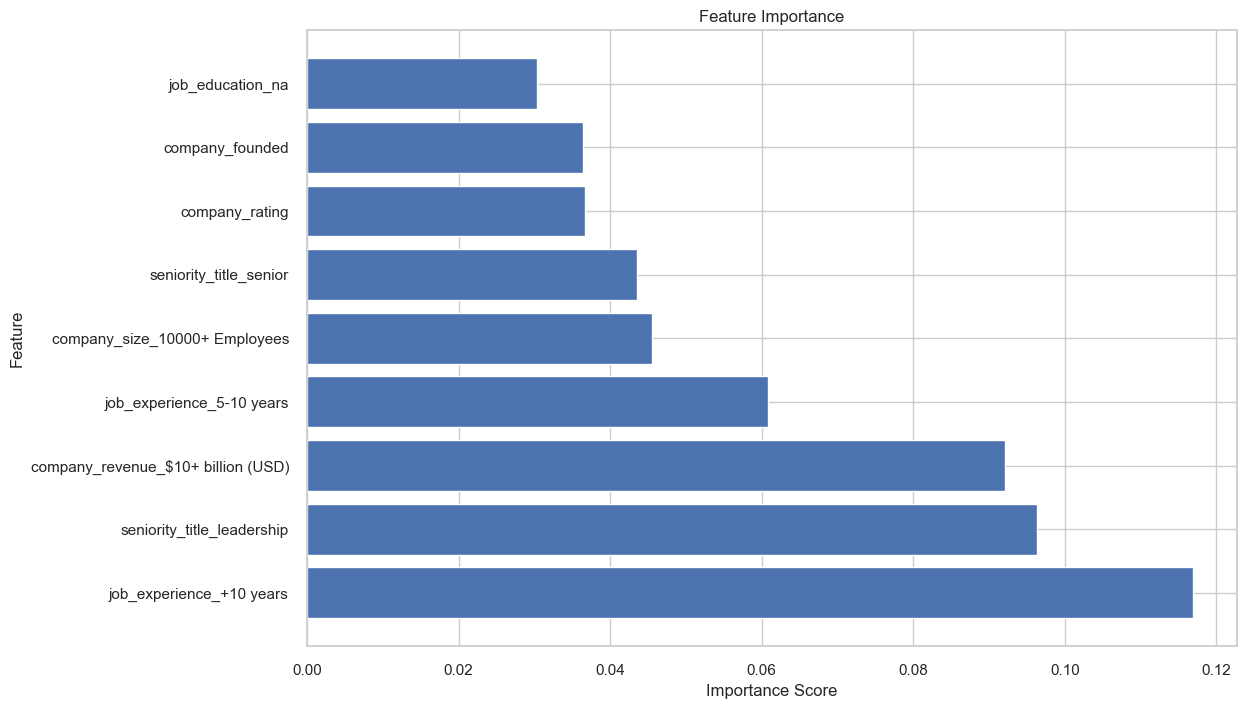

In [47]:
plot_feature_importance(feature_importance_df)

## Building the Models 👨‍💻

In [48]:
df.head()

,company,company_rating,location,job_title,job_description,company_founded,salary_estimate,link,tableau_yn,powerbipower bi_yn,...,company_sector_Manufacturing,company_sector_Media & Communication,company_sector_Non-profit & NGO,company_sector_Personal Consumer Services,company_sector_Pharmaceutical & Biotechnology,company_sector_Real Estate,company_sector_Restaurants & Food Service,company_sector_Retail & Wholesale,company_sector_Telecommunications,company_sector_Transportation & Logistics
0,Grit Search,5.0,Singapore,"Senior Analyst, Information Technology (Platform)",Location\nSingapore\nDate\n21 Sep\nIndustry\nT...,2020,16200.0,"Senior Analyst, Information Technology (Platfo...",0,0,...,0,0,0,0,0,0,0,0,0,0
1,Kabam Robotics,4.0,Serangoon,Software Engineering Intern,Be a part of the robotics revolution!\nWe are ...,2006,6100.0,Software Engineering InternBe a part of the ro...,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Hiverlab,4.5,Singapore,Backend Engineer,Company\nHiverlab\nhiverlab.com\nDesignation\n...,2014,11400.0,Backend EngineerCompany\nHiverlab\nhiverlab.co...,1,0,...,0,0,0,0,0,0,0,0,0,0
3,YOLO TECHNOLOGY PTE. LTD.,4.1,Singapore,Data Science Intern,Key Responsibilities:\nData Crunching and data...,2016,16800.0,Data Science InternKey Responsibilities:\nData...,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NetVirta,4.8,Singapore,Researcher Intern,Company\nNetVirta\nnetvirta.com\nDesignation\n...,2013,30900.0,Researcher InternCompany\nNetVirta\nnetvirta.c...,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Drop the specified columns from the df dataframe
columns_to_drop = ['company', 'location', 'job_title', 'job_description', 'link']
df_model = df.drop(columns=columns_to_drop)

# check the result
df_model.head()

,company_rating,company_founded,salary_estimate,tableau_yn,powerbipower bi_yn,qilk_yn,qlikview_yn,sas_yn,spss_yn,alteryx_yn,...,company_sector_Manufacturing,company_sector_Media & Communication,company_sector_Non-profit & NGO,company_sector_Personal Consumer Services,company_sector_Pharmaceutical & Biotechnology,company_sector_Real Estate,company_sector_Restaurants & Food Service,company_sector_Retail & Wholesale,company_sector_Telecommunications,company_sector_Transportation & Logistics
0,5.0,2020,16200.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,2006,6100.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,4.5,2014,11400.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.1,2016,16800.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.8,2013,30900.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
# remove rows with NaN value in df_model and check the resulting shpae
df_model.dropna(inplace=True)

df_model.shape

(5743, 373)

#### model 1 & 2

## Final Data After Cleaning 🤹

In [75]:
df

,company,company_rating,location,job_title,job_description,salary_estimate,company_size,company_type,company_sector,company_industry,...,aws certified sysops administrator_yn,aws certified devops engineer_yn,aws certified security - specialty_yn,google associate cloud engineer_yn,google professional devops engineer_yn,google professional security engineer_yn,azure fundamentals_yn,azure administrator associate_yn,azure security engineer associate_yn,azure ai_yn
0,Grit Search,5.0,Singapore,"Senior Analyst, Information Technology (Platform)",Location\nSingapore\nDate\n21 Sep\nIndustry\nT...,12000.0,1 to 50 Employees,Company - Private,Human Resources & Staffing,HR Consulting,...,0,0,0,0,0,0,0,0,0,0
1,Kabam Robotics,4.0,Serangoon,Software Engineering Intern,Be a part of the robotics revolution!\nWe are ...,12000.0,501 to 1000 Employees,Company - Private,Media & Communication,Video Game Publishing,...,0,0,0,0,0,0,0,0,0,0
2,Hiverlab,4.5,Singapore,Backend Engineer,Company\nHiverlab\nhiverlab.com\nDesignation\n...,12600.0,1 to 50 Employees,Company - Private,Information Technology,Computer Hardware Development,...,0,0,0,0,0,0,0,0,0,0
3,YOLO TECHNOLOGY PTE. LTD.,4.1,Singapore,Data Science Intern,Key Responsibilities:\nData Crunching and data...,13200.0,1 to 50 Employees,Company - Private,Information Technology,Enterprise Software & Network Solutions,...,0,0,0,0,0,0,0,0,0,0
4,NetVirta,4.8,Singapore,Researcher Intern,Company\nNetVirta\nnetvirta.com\nDesignation\n...,15000.0,51 to 200 Employees,Company - Private,Information Technology,Computer Hardware Development,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5929,JTC Corporation,3.4,Singapore,Network Manager (Contract),What the role is\nJTC is looking for a passion...,99298.0,501 to 1000 Employees,Government,Government & Public Administration,National Services & Agencies,...,0,0,0,0,0,0,0,0,0,0
5930,People Profilers,4.2,Singapore,SOC Manager (Infosecurity),Job Description:\nThe Security Operations Cent...,99312.0,1 to 50 Employees,Company - Private,Human Resources & Staffing,HR Consulting,...,0,0,0,0,0,0,0,0,0,0
5931,Veeva Systems,4.1,Singapore,Senior Data Scientist,Veeva [NYSE: VEEV] is the leader in cloud-base...,99390.0,5001 to 10000 Employees,Company - Public,Information Technology,Enterprise Software & Network Solutions,...,0,0,0,0,0,0,0,0,0,0
5932,Arup,4.2,Singapore,Business Support Analyst,Do you want to make a positive impact on the w...,99499.0,10000+ Employees,Company - Private,"Construction, Repair & Maintenance Services",Architectural & Engineering Services,...,0,0,0,0,0,0,0,0,0,0


In [76]:
columns= df.columns
# Print the column names
for column in columns:
    print(column)

company
company_rating
location
job_title
job_description
salary_estimate
company_size
company_type
company_sector
company_industry
company_founded
company_revenue
unique_id
job_education
job_experience
job_simp
seniority_title
tableau_yn
powerbipower bi_yn
qilk_yn
qlikview_yn
sas_yn
spss_yn
alteryx_yn
knime_yn
rapidminer_yn
excel_yn
google sheets_yn
stata_yn
jupyter notebook_yn
zeppelin notebook_yn
microstrategy_yn
looker_yn
sap businessobjects_yn
talend_yn
informatica powercenter_yn
d3\.js_yn
bokeh_yn
ggplot_yn
cloud service_yn
virtualization_yn
cybersecurity_yn
cloud storage_yn
multicloud_yn
linux_yn
automation_yn
orchestration_yn
containerization_yn
devops_yn
infrastructure as a service_yn
platform as a service_yn
software as a service_yn
database as a service_yn
serverless_yn
microservices_yn
data migration_yn
system migration_yn
cloud migration_yn
hybrid cloud_yn
public cloud_yn
private cloud_yn
cloud networking_yn
cloud security_yn
cloud applications_yn
cloud architecture_yn
clo

## Building The Model

In [52]:
from pycaret.regression import *
import mlflow

In [6]:
exp_name = setup(data = df,  target = 'salary_estimate', train_size = 0.8,
                ordinal_features = {'seniority_title': ['internship','entry level','na','senior', 'leadership'],
                                   'job_education': ['na','Bachelors','MBA','Masters','Doctorate'],
                                   'company_size': ['0','Unknown','1 to 50 Employees','51 to 200 Employees',
                                                   '201 to 500 Employees','501 to 1000 Employees','1001 to 5000 Employees',
                                                   '5001 to 10000 Employees','10000+ Employees'],
                                   'job_experience':['0-2 years','2-5 years','5-10 years','+10 years']},
                ignore_features = ['job_description','location','job_title','unique_id'], n_jobs = 14,
                log_experiment = True)

,Description,Value
0,Session id,6698
1,Target,salary_estimate
2,Target type,Regression
3,Original data shape,"(5934, 201)"
4,Transformed data shape,"(5934, 2317)"
5,Transformed train set shape,"(4747, 2317)"
6,Transformed test set shape,"(1187, 2317)"
7,Ignore features,4
8,Ordinal features,4
9,Numeric features,186


In [109]:
best_model = compare_models(n_select = 3, budget_time = 60, turbo = True)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,22947.1441,1011829830.5679,31753.3017,0.6622,0.2748,0.2219,0.7630
lasso,Lasso Regression,22995.0354,1015004216.6527,31803.9607,0.6611,0.2759,0.2223,2.5880
omp,Orthogonal Matching Pursuit,23009.6959,1016335726.4111,31825.7827,0.6606,0.2769,0.2224,0.7260
et,Extra Trees Regressor,23110.1042,1120678848.1631,33420.5003,0.6246,0.2771,0.2214,21.1880
gbr,Gradient Boosting Regressor,24535.2979,1183231140.0802,34318.6804,0.6061,0.2975,0.2484,2.5320
llar,Lasso Least Angle Regression,25171.1522,1185176234.5641,34354.4268,0.6036,0.3037,0.2553,0.7670
rf,Random Forest Regressor,27235.2790,1348284520.1825,36662.4098,0.5498,0.3332,0.2921,10.7140
en,Elastic Net,28067.5059,1443493115.3682,37938.2416,0.5181,0.3328,0.2886,4.0200
ada,AdaBoost Regressor,35339.5145,1840662018.3132,42882.1452,0.3803,0.4174,0.4240,8.5410
br,Bayesian Ridge,32465.1117,1862735966.3323,43109.4204,0.3774,0.3790,0.3386,7.8020


### Gradient Boosting Regression

In [7]:
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24854.1552,1346608634.5853,36696.1665,0.6002,0.2972,0.2410
1,25301.0720,1223030273.4319,34971.8497,0.5699,0.3195,0.2684
2,24084.2736,1025176880.7567,32018.3835,0.6374,0.3027,0.2551
3,25696.1324,1193011679.5844,34540.0012,0.6453,0.3066,0.2611
4,25766.5031,1395126239.6377,37351.3887,0.6010,0.3185,0.2581
5,23969.9985,1053590861.1824,32459.0644,0.6372,0.2803,0.2307
6,24726.5824,1153558427.9846,33964.0756,0.6260,0.3147,0.2631
7,24846.0769,1136683659.9781,33714.7395,0.5884,0.3116,0.2644
8,25818.7851,1396098289.6893,37364.3987,0.5182,0.3201,0.2653


In [8]:
tuned_gbr = tune_model(gbr, optimize = 'R2', search_library = 'scikit-optimize',
                        search_algorithm = 'bayesian', n_iter = 10, return_train_score = True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


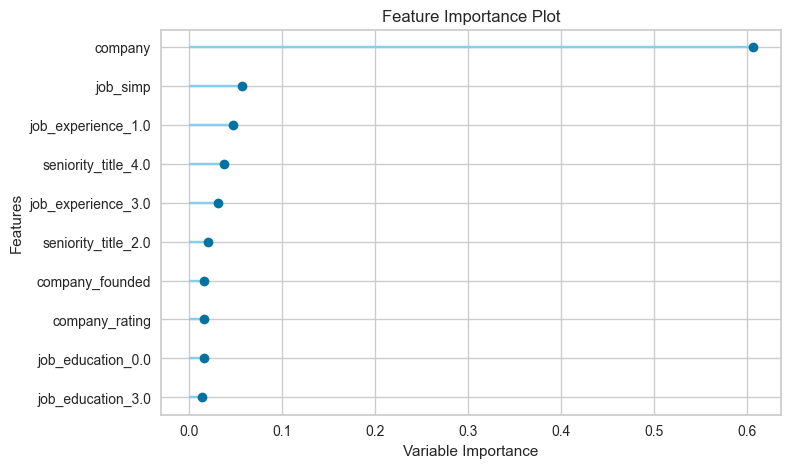

In [7]:
plot_model(tuned_gbr, plot = 'feature')

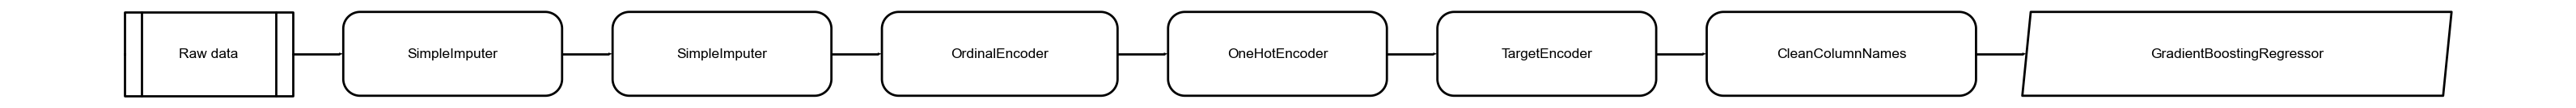

In [8]:
plot_model(tuned_gbr, plot = 'pipeline')

In [9]:
plot_model(tuned_gbr, plot = 'parameter')

,Parameters
alpha,0.9
ccp_alpha,0.0
criterion,friedman_mse
init,None
learning_rate,0.04978990749323866
loss,squared_error
max_depth,4
max_features,0.9975002147787029
max_leaf_nodes,None
min_impurity_decrease,3.958356022949507e-08


In [10]:
evaluate_model(tuned_gbr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
save_model(tuned_gbr, 'saved_tuned_gbr_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\KEMENKEU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['company_rating',
                                              'company_founded', 'tableau_yn',
                                              'powerbipower bi_yn', 'qilk_yn',
                                              'qlikview_yn', 'sas_yn', 'spss_yn',
                                              'alteryx_yn', 'knime_yn',
                                              'rapidminer_yn', 'excel_yn',
                                              'google sheets_yn', 'stata_yn',
                                              'jupyter notebook_yn',
                                              '...
                                                               handle_missing='return_nan'))),
                 ('clean_column_names',
                  TransformerWrapper(transformer=CleanColumnNames())),
                 ('trai

### Random Forest Regression

In [11]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24903.0790,1227874176.6305,35041.0356,0.5738,0.3343,0.2798
1,24519.0930,1142615661.6034,33802.5984,0.5899,0.2964,0.2411
2,25388.9850,1247115070.5759,35314.5164,0.5799,0.3061,0.2515
3,24979.5916,1246772094.9261,35309.6601,0.6375,0.3059,0.2488
4,26981.9693,1665141550.6071,40806.1460,0.5154,0.3210,0.2561
5,24972.1066,1195044598.5750,34569.4171,0.6117,0.3038,0.2487
6,23673.1910,1166119813.8670,34148.4965,0.5860,0.2993,0.2429
7,24877.2031,1297651745.7994,36022.9336,0.5842,0.3148,0.2552
8,23247.7430,1102552725.9878,33204.7094,0.6163,0.2781,0.2300


In [12]:
tuned_rf = tune_model(rf, optimize = 'R2', search_library = 'scikit-optimize',
                        search_algorithm = 'bayesian', n_iter = 10, return_train_score = True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


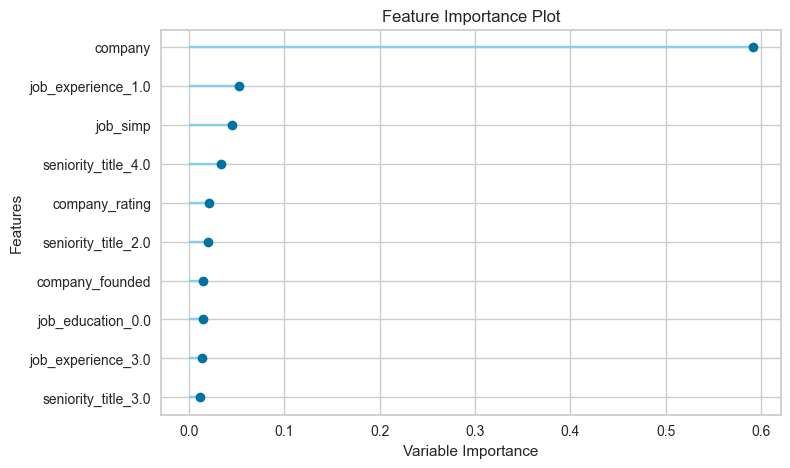

In [13]:
plot_model(tuned_rf, plot = 'feature')

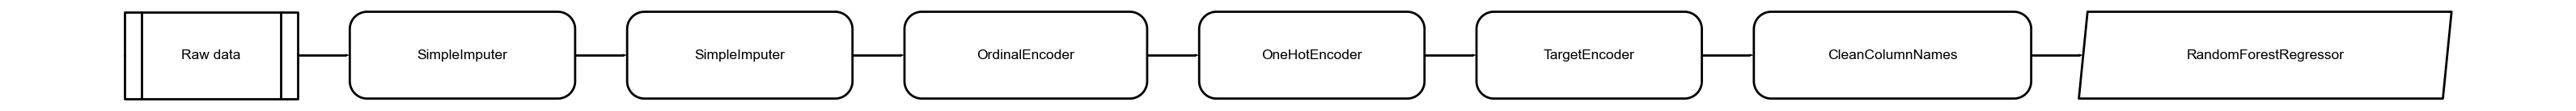

In [14]:
plot_model(tuned_rf, plot = 'pipeline')

In [15]:
plot_model(tuned_rf, plot = 'parameter')

,Parameters
bootstrap,True
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


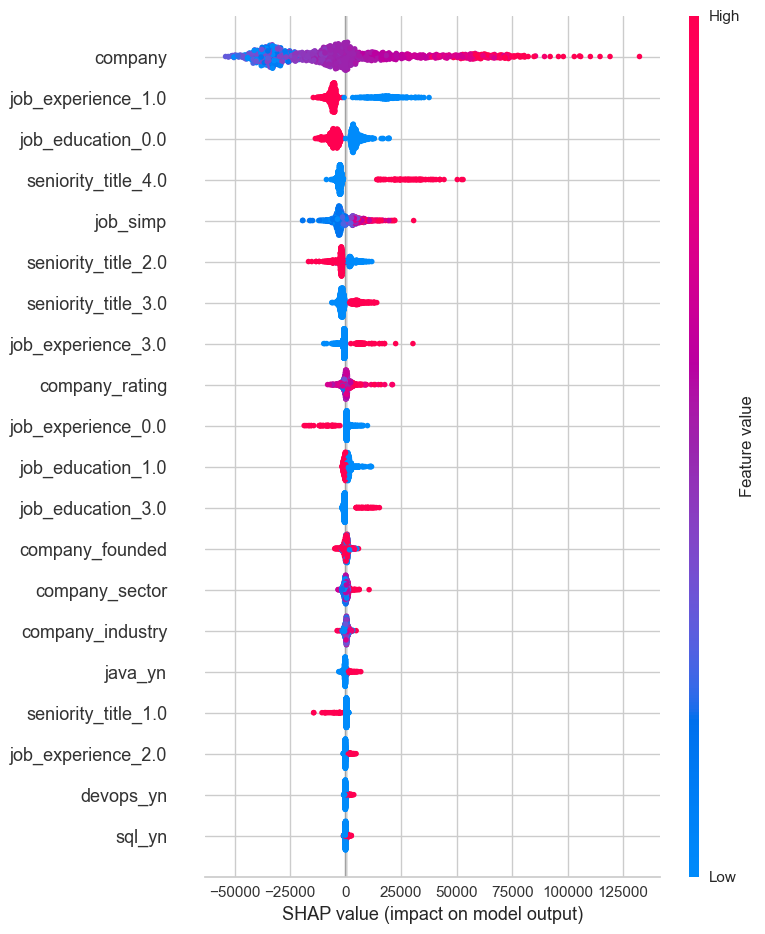

In [16]:
interpret_model(tuned_rf)

In [17]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [18]:
save_model(tuned_rf, 'saved_tuned_rf_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\KEMENKEU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['company_rating',
                                              'company_founded', 'tableau_yn',
                                              'powerbipower bi_yn', 'qilk_yn',
                                              'qlikview_yn', 'sas_yn', 'spss_yn',
                                              'alteryx_yn', 'knime_yn',
                                              'rapidminer_yn', 'excel_yn',
                                              'google sheets_yn', 'stata_yn',
                                              'jupyter notebook_yn',
                                              '...
                  TransformerWrapper(include=['company', 'company_sector',
                                              'company_industry', 'job_simp'],
                                     transformer=TargetEncoder(cols=['compa

### Lasso Regression

In [5]:
lasso = create_model('lasso')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24778.1762,1148193694.3252,33885.0069,0.6014,0.3218,0.2646
1,22680.0500,899705126.4256,29995.0850,0.6771,0.2747,0.2245
2,24044.1153,1078024825.5076,32833.2884,0.6369,0.2808,0.2290
3,25177.5893,1157596276.9810,34023.4666,0.6635,0.3100,0.2473
4,24867.9521,1323670004.3756,36382.2760,0.6148,0.2883,0.2190
5,23542.0475,1032925605.8678,32139.1600,0.6644,0.2922,0.2298
6,23274.7501,962514337.8320,31024.4152,0.6583,0.2914,0.2423
7,24385.4740,1135710597.5317,33700.3056,0.6361,0.2963,0.2348
8,23552.7016,994482771.8471,31535.4209,0.6539,0.2751,0.2323


In [6]:
tuned_lasso = tune_model(lasso, optimize = 'R2', search_library = 'scikit-optimize',
                        search_algorithm = 'bayesian', n_iter = 10, return_train_score = True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [7]:
# Get the feature names
feature_names = get_config('X').columns

# Access the Ridge model coefficients
lasso_coefs = tuned_lasso.coef_

# Create a dictionary mapping feature names to coefficients
feature_coefs = dict(zip(feature_names, lasso_coefs))

# Sort the feature names based on the coefficient values
sorted_features = sorted(feature_coefs.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature names and coefficients
for feature, coef in sorted_features:
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: azure administrator associate_yn, Coefficient: 5067.721370897136
Feature: cloud strategy_yn, Coefficient: 1861.6024841877863
Feature: company_rating, Coefficient: 1276.9533787844293
Feature: company, Coefficient: 1.1268587900032
Feature: cloud computing_yn, Coefficient: 3.208175403722228e-11
Feature: azure security engineer associate_yn, Coefficient: 2.925733167222281e-11
Feature: java_yn, Coefficient: 2.8839808366092448e-11
Feature: cloud governance_yn, Coefficient: 2.1569990800528585e-11
Feature: sql_yn, Coefficient: 1.9801656798094133e-11
Feature: company_size, Coefficient: 1.606339639463705e-11
Feature: ruby_yn, Coefficient: 1.439841401287775e-11
Feature: python_yn, Coefficient: 1.1844153787139096e-11
Feature: groovy_yn, Coefficient: 1.0174060562617668e-11
Feature: perl_yn, Coefficient: 9.289893561400442e-12
Feature: matlab_yn, Coefficient: 2.118316773749605e-12
Feature: company_type, Coefficient: 1.1362168767134576e-12
Feature: company_sector, Coefficient: 1.0111287801945

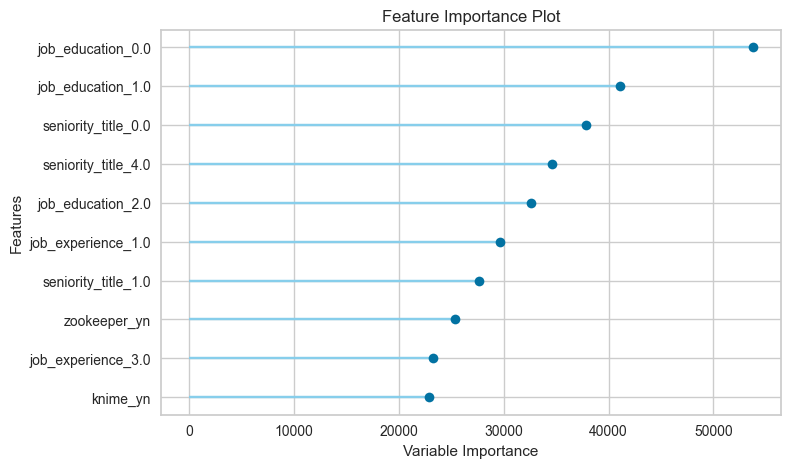

In [8]:
plot_model(tuned_lasso, plot = 'feature')

In [9]:
plot_model(tuned_lasso, plot = 'parameter')

,Parameters
alpha,9.44983414441751
copy_X,True
fit_intercept,False
max_iter,1000
positive,False
precompute,False
random_state,4741
selection,cyclic
tol,0.0001
warm_start,False


In [10]:
save_model(tuned_lasso, 'saved_tuned_lasso_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\KEMENKEU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['company_rating',
                                              'company_founded', 'tableau_yn',
                                              'powerbipower bi_yn', 'qilk_yn',
                                              'qlikview_yn', 'sas_yn', 'spss_yn',
                                              'alteryx_yn', 'knime_yn',
                                              'rapidminer_yn', 'excel_yn',
                                              'google sheets_yn', 'stata_yn',
                                              'jupyter notebook_yn',
                                              '...
                  TransformerWrapper(include=['company', 'company_sector',
                                              'company_industry', 'job_simp'],
                                     transformer=TargetEncoder(cols=['compa

### Ridge Regression

In [7]:
ridge = create_model('ridge')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,24128.4806,1169878393.7987,34203.4851,0.6539,0.2892,0.2322
1,23710.0343,1023905404.8377,31998.5219,0.6714,0.3115,0.2450
2,23586.9786,975954081.4201,31240.2638,0.6502,0.2925,0.2265
3,22499.3471,905770026.7035,30096.0135,0.6887,0.2846,0.2287
4,23181.8794,937432470.2150,30617.5190,0.6805,0.2972,0.2434
5,23339.3618,956556147.5031,30928.2419,0.6704,0.2755,0.2228
6,22172.5688,876024645.4441,29597.7135,0.6776,0.2769,0.2259
7,23543.2945,1070682751.6334,32721.2890,0.6573,0.3031,0.2398
8,25239.5447,1205965527.2504,34727.0144,0.6192,0.2958,0.2401


In [8]:
tuned_ridge = tune_model(ridge, optimize = 'R2', search_library = 'scikit-optimize',
                        search_algorithm = 'bayesian', n_iter = 10,
                        return_train_score = True)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits


In [18]:
# Get the feature names
feature_names = get_config('X').columns

# Access the Ridge model coefficients
ridge_coefs = tuned_ridge.coef_

# Create a dictionary mapping feature names to coefficients
feature_coefs = dict(zip(feature_names, ridge_coefs))

# Sort the feature names based on the coefficient values
sorted_features = sorted(feature_coefs.items(), key=lambda x: x[1], reverse=True)

# Print sorted feature names and coefficients
for feature, coef in sorted_features:
    print(f"Feature: {feature}, Coefficient: {coef}")

Feature: cloud analytics_yn, Coefficient: 388.6841932471029
Feature: cloud performance_yn, Coefficient: 388.68419324669446
Feature: cloud scalability_yn, Coefficient: 388.6841932466943
Feature: cloud reliability_yn, Coefficient: 388.684193246694
Feature: cloud monitoring_yn, Coefficient: 388.6841932466939
Feature: cloud applications_yn, Coefficient: 388.684193246248
Feature: cloud architecture_yn, Coefficient: 388.68419324624733
Feature: cloud networking_yn, Coefficient: 388.68419324624716
Feature: cloud security_yn, Coefficient: 388.68419324624676
Feature: serverless_yn, Coefficient: 388.6841932460225
Feature: microservices_yn, Coefficient: 388.68419324602013
Feature: data migration_yn, Coefficient: 388.68419324601984
Feature: system migration_yn, Coefficient: 388.6841932460194
Feature: software as a service_yn, Coefficient: 388.68419324581157
Feature: database as a service_yn, Coefficient: 388.6841932458115
Feature: platform as a service_yn, Coefficient: 388.6841932458094
Feature: in

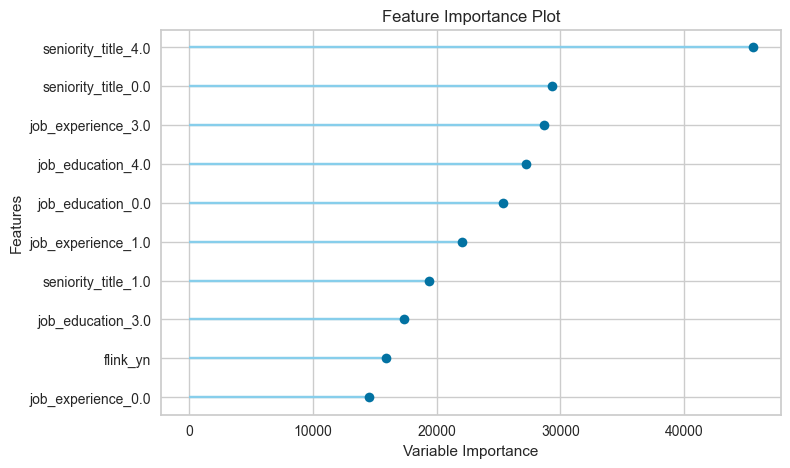

In [29]:
plot_model(tuned_ridge, plot = 'feature')

In [13]:
# get the hyperparameter
tuned_ridge.get_params()

{'alpha': 5.148147203127749,
 'copy_X': True,
 'fit_intercept': False,
 'max_iter': None,
 'positive': False,
 'random_state': 8170,
 'solver': 'auto',
 'tol': 0.0001}

In [14]:
plot_model(tuned_ridge, plot = 'parameter')

,Parameters
alpha,5.148147203127749
copy_X,True
fit_intercept,False
max_iter,None
positive,False
random_state,8170
solver,auto
tol,0.0001


In [21]:
save_model(tuned_ridge, 'saved_tuned_ridge_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=C:\Users\KEMENKEU\AppData\Local\Temp\joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['company_rating',
                                              'company_founded', 'tableau_yn',
                                              'powerbipower bi_yn', 'qilk_yn',
                                              'qlikview_yn', 'sas_yn', 'spss_yn',
                                              'alteryx_yn', 'knime_yn',
                                              'rapidminer_yn', 'excel_yn',
                                              'google sheets_yn', 'stata_yn',
                                              'jupyter notebook_yn',
                                              '...
                  TransformerWrapper(include=['company', 'company_industry',
                                              'job_simp'],
                                     transformer=LeaveOneOutEncoder(cols=['company',
        

### Random Forest with Text Data

In [62]:
df = pd.read_csv("glass_door_salaries_sg.csv")

In [64]:
df['link'] = pd.concat([df['job_title'], df['job_description'],df['company'],df['company_industry']], axis=1).apply(lambda x: ''.join(x), axis=1)

In [71]:
def clean_word(job_descriptions):
    jd_data=[]
    pattern = "([a-zA-Z]+(?:'[a-z]+)?)"
    stopwords_list = stopwords.words('english')
    stopwords_list += list(string.punctuation)
    stopwords_list += ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
    stopwords_list += ['www','http','com','llc','covid','non','pm','am','eg','e','g','ie','i','work','roles','team','met',
                      'new','teams','life','day','time','pte','ltd','us','etc']
    
    for jd in job_descriptions:
        jd_tokens_raw = nltk.regexp_tokenize(jd, pattern)
        jd_tokens=[word.lower() for word in jd_tokens_raw]
        jd_words_stopped = [word for word in jd_tokens if word not in stopwords_list]
        jd_data.append(jd_words_stopped)

    return pd.Series(jd_data) # Turn list of lists to series of lists to use in Word2Vec

In [72]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Convert text data into numerical features
vectorizer = CountVectorizer()
X = clean_word(df['link'].tolist())
X = vectorizer.fit_transform(X)  # Assuming X is a list of text documents
y = df["salary_estimate"]
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = RandomForestRegressor(n_estimators = 100, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) 
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

AttributeError: 'list' object has no attribute 'lower'

this was done in other notebook

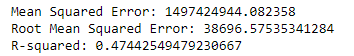